In [ ]:
#@title Browse on Google Colab

In [ ]:
%%shell
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg
Package: *
Pin: release a=eoan
Pin-Priority: 500
Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300
Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF
apt-get update
apt-get install chromium chromium-driver
pip install selenium
pip uninstall -y selenium_profiles
pip install --no-cache-dir selenium_profiles>=2.2.4.7.4


Executing: /tmp/apt-key-gpghome.6P9BwGTbHC/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
gpg: key DCC9EFBF77E11517: public key "Debian Stable Release Key (10/buster) <debian-release@lists.debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.2xMcNPvmK6/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
gpg: key DC30D7C23CBBABEE: public key "Debian Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.2WZ9AvK1kF/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
gpg: key 4DFAB270CAA96DFA: public key "Debian Security Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
/bin/bash: line 11: Package:: command not found
/bin/bash: line 12: Pin:: command not found
/bin/bas

In [ ]:
from selenium_profiles.utils.installer import install_chromedriver
install_chromedriver()

/usr/local/lib/python3.8/dist-packages/selenium_profiles/utils/colab_utils.py:90: UserWarning: Cannot find the undetected_chromedriver module. If you want to use undetected-chromedriveryou can install it with 'pip install undetected_chromedriver'
and then run in Python:
from selenium_profiles.utils.colab_utils import patch_uc
patch_uc()
  warnings.warn(


In [ ]:
from selenium import webdriver
from selenium_profiles.utils.colab_utils import showscreen
import threading
import time
import cv2
import matplotlib.pyplot as plt
import tempfile
from PIL import Image
from IPython import display
from google.colab.patches import cv2_imshow

In [ ]:
from IPython.core import interactiveshell


class Brows():
  def __init__(self,win_x:int=100,win_y:int=100):
    self.win_x=win_x
    self.win_y=win_y
    self.active=False
    self.run=0
    pass
  def startup(self):
    self.active=True
    self.opt=webdriver.ChromeOptions()
    self.opt.add_argument('--headless')
    self.opt.add_argument('--no-sandbox')
    self.driver = webdriver.Chrome(options=self.opt)
    self.driver.set_window_size(self.win_x,self.win_y)
    # self.thread=threading.Thread(target=self.drawing)
  def access(self,url):
    self.driver.get(url)
    self.output()
    # showscreen(self.driver)
  
  def output(self):
    img=None
    with tempfile.NamedTemporaryFile(dir='./') as fp:
      self.driver.save_screenshot(fp.name)
      fp.file.seek(0)
      img=cv2.imread(fp.name)
    self.show_img(img)
    pass
  def show_img(self,img):
    fig = plt.figure(dpi=150)
    raw =img
    # raw = cv2.resize(img,(1200,600),interpolation=cv2.INTER_NEAREST)
    raw = cv2.cvtColor(raw,cv2.COLOR_BGR2RGB)
    # edited_img = cv2.putText(raw, 'Umai IEKEI', (0,50), cv2.FONT_HERSHEY_PLAIN, 3, (0, 255,0), 3, cv2.LINE_AA)
    plt.imshow(raw)
    plt.show()  
  
  def drawing(self):
    if self.active and self.run<=10:
      time.sleep(0.2)
      showscreen(self.driver)
      self.run+=1
      self.drawing()
  def exit(self):
    self.driver.quit()

In [ ]:
width=1200 #@param
height=600 #@param
browser = Brows(width,height)
browser.startup()

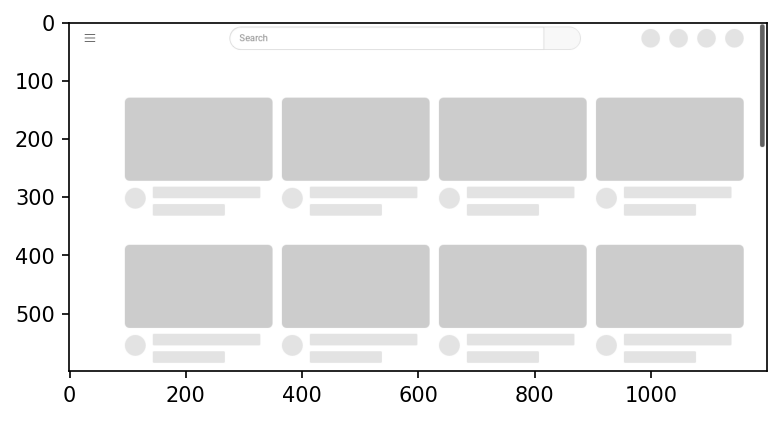

In [ ]:
url="https://youtube.com"#@param {type:"string"}
browser.access(url)
# browser.drawing()

/usr/local/lib/python3.8/dist-packages/selenium/webdriver/remote/webdriver.py:888: UserWarning: name used for saved screenshot does not match file type. It should end with a `.png` extension
  warnings.warn(


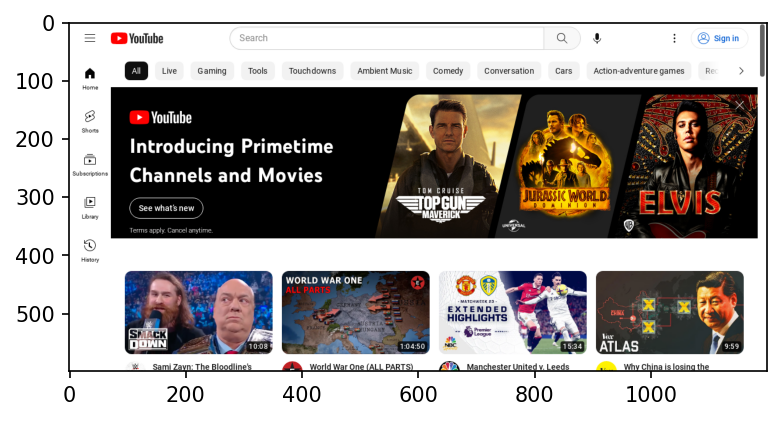

In [ ]:
browser.output()